In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pathlib import Path
plt.style.use("bmh")

In [6]:
grace = pd.read_csv("DATA/GRACE/STATIONS/BRAZ.csv",index_col="DATE",parse_dates=["DATE"]) 
gnss = pd.read_csv("DATA/GNSS_NON_TREND//BRAZ.csv",index_col="DATE",parse_dates=["DATE"])

In [7]:
gnss.describe()

,datedecimal,Altitude,Altitude_non_trend,Altitude_smooth
count,839.000000,839.000000,839.000000,839.000000
mean,2008.113341,1106.010435,-0.340948,-0.340924
std,4.661960,0.009158,0.009161,0.008573
min,2000.005479,1105.981099,-0.370295,-0.364831
25%,2004.097260,1106.005352,-0.346032,-0.345486
50%,2008.112329,1106.010179,-0.341204,-0.341455
75%,2012.127397,1106.016794,-0.334586,-0.334576
max,2016.238356,1106.032300,-0.319074,-0.322648


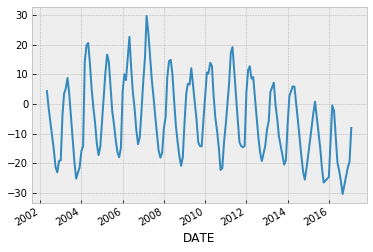

In [9]:
grace["MEAN"] = grace.mean(axis=1)
grace.MEAN.plot()

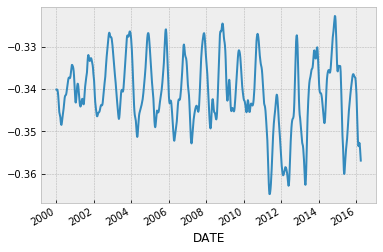

In [10]:
gnss.Altitude_smooth.plot()

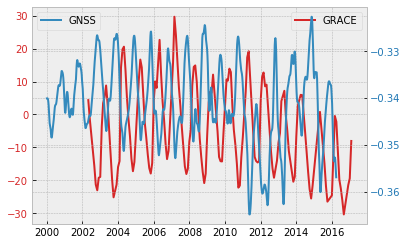

In [53]:
fig, ax1 = plt.subplots() 
color = 'tab:red' 
ax1.plot(grace.index,grace.MEAN,color=color,label="GRACE") 
ax1.tick_params(axis='y', labelcolor=color)
plt.legend()

ax2 = ax1.twinx() 
color = 'tab:blue' 
ax2.plot(gnss.index, gnss.Altitude_smooth,label="GNSS") 
ax2.tick_params(axis='y', labelcolor=color)

plt.legend();

In [70]:
def plot_gnssxgrace(gnss_path,grace_path, path_fig=None, save=False):
    grace = pd.read_csv(grace_path,index_col="DATE",parse_dates=["DATE"]) 
    gnss = pd.read_csv(gnss_path,index_col="DATE",parse_dates=["DATE"])
    
    grace["MEAN"] = grace.mean(axis=1)
    
    fig, ax1 = plt.subplots() 
    color = 'tab:red' 
    ax1.plot(grace.index,grace.MEAN,color=color,label="GRACE") 
    ax1.tick_params(axis='y', labelcolor=color)
    plt.grid(False)
    plt.legend(loc="upper left")

    ax2 = ax1.twinx() 
    color = 'tab:blue' 
    ax2.plot(gnss.index, gnss.Altitude_smooth,label="GNSS") 
    ax2.tick_params(axis='y', labelcolor=color)
    plt.grid(False)
    plt.legend(loc="upper right");
    
    if save and path_fig:
        plt.savefig(path_fig)

/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


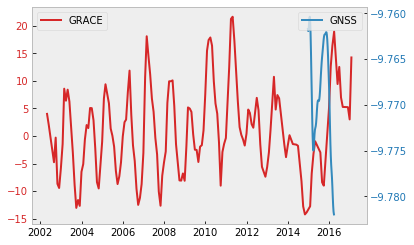

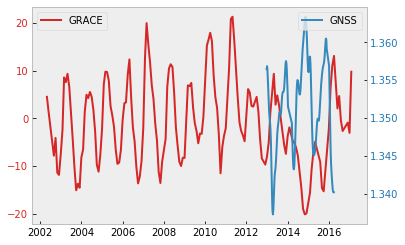

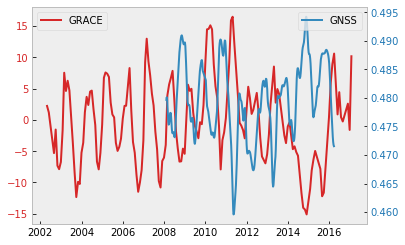

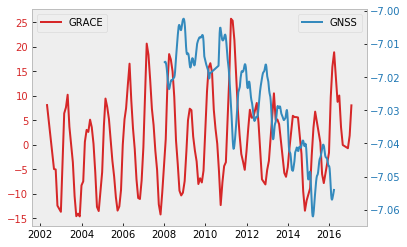

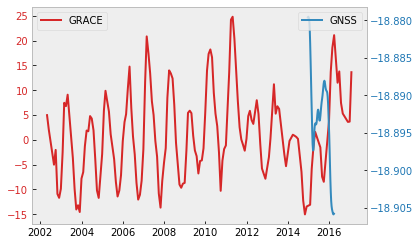

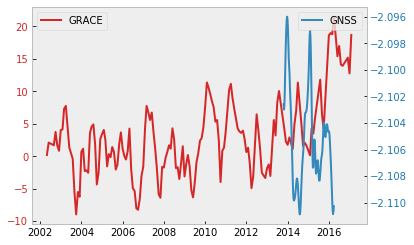

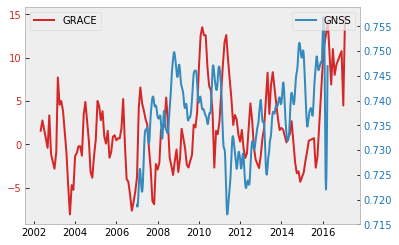

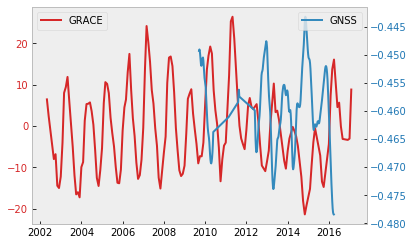

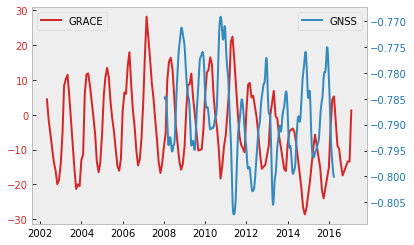

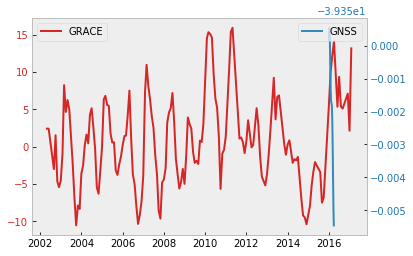

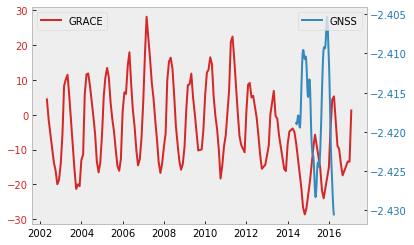

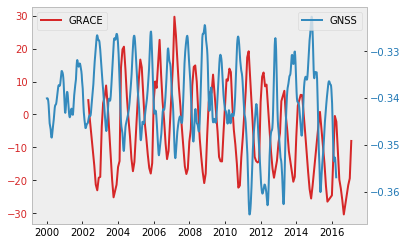

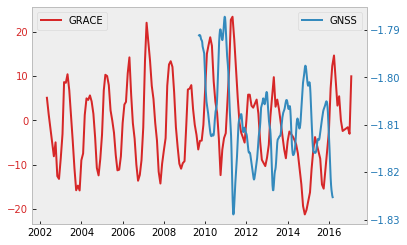

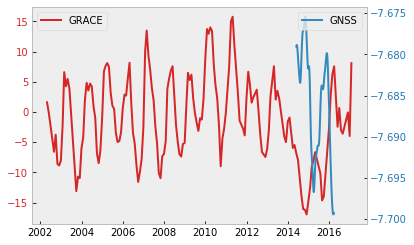

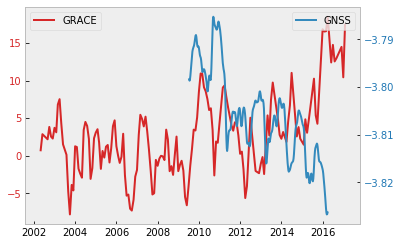

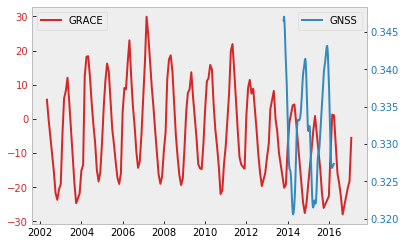

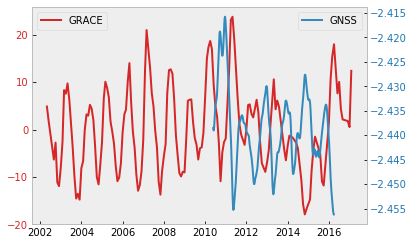

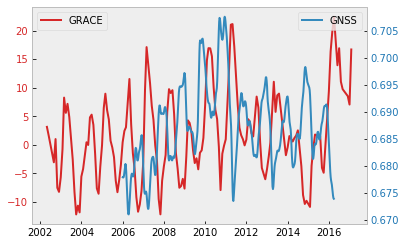

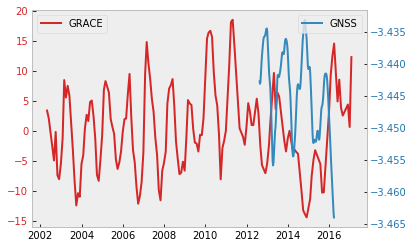

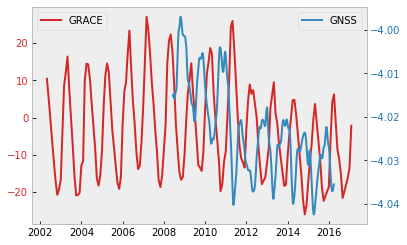

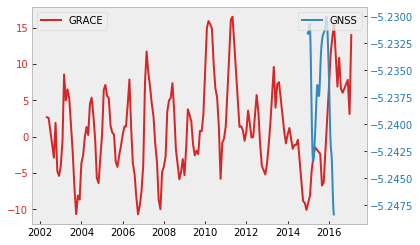

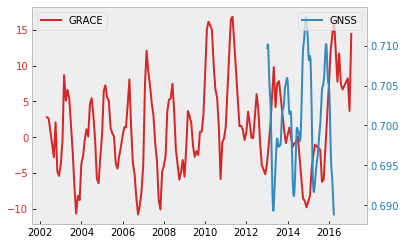

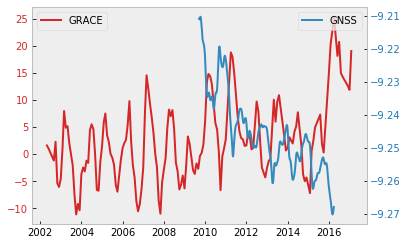

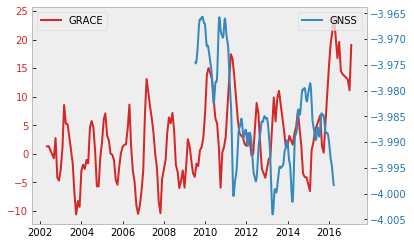

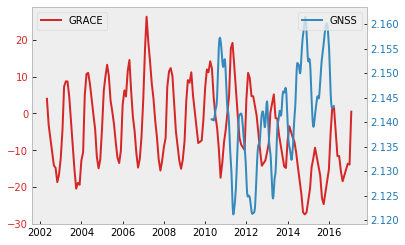

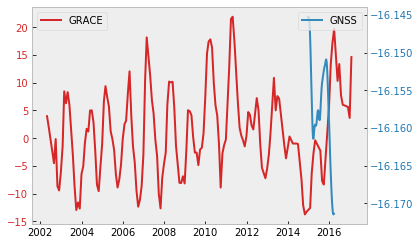

In [72]:
stations_grace = Path("DATA/GRACE/STATIONS")
stations_gnss = Path("DATA/GNSS_NON_TREND/")

for station_grace in stations.iterdir():
    station_gnss = stations_gnss / station_grace.name
    if station_gnss.exists():
        path_fig = "IMAGENS/" + station_grace.name[:-4]
        plot_gnssxgrace(station_gnss.as_posix(),station_grace.as_posix(),path_fig,save=True)